# 1. 비모수/다변량 검정

## 1.1. 비모수 통계학

## [실습 1] : Rank, Normality check, Gaussian data

### rank_data

In [1]:
# example of ranking real-valued observations
from numpy.random import rand
from numpy.random import seed
from scipy.stats import rankdata
# seed random number generator
seed(1)
# generate dataset
data = rand(1000)
# review first 10 samples
print(data[:10])
# rank data
ranked = rankdata(data)# <-------------***
# review first 10 ranked samples
print(ranked[:10])

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
 3.96767474e-01 5.38816734e-01]
[408. 721.   1. 300. 151.  93. 186. 342. 385. 535.]


### Normality Check

* Gaussian data 생성

In [2]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50 # <-------------***
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


* Histogram 생성

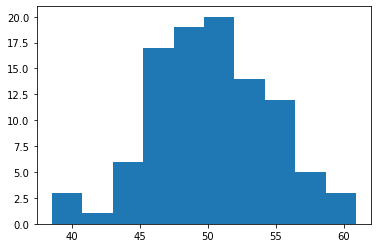

In [3]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# histogram plot
pyplot.hist(data) # <-------------***
pyplot.show()

* Q-Q plot 생성

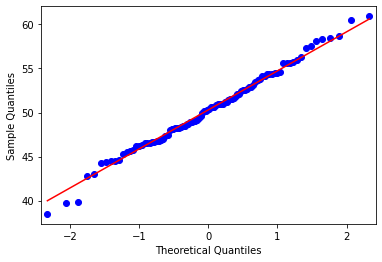

In [4]:
# q-q plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(data, line='s') # <-------------***
pyplot.show()

### Statistical test for nomalich check

* Shapiro-Wilk Test

In [5]:
# example of the shapiro-wilk test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(data)  # <-------------***
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


### Gaussian-like data를 Gaussian data로 만들기

* Sample size 증가

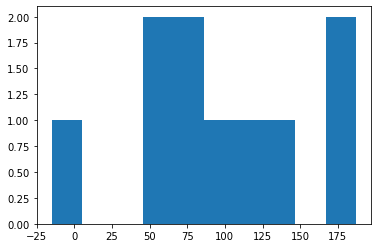

In [6]:
# histogram plot of a small sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = 50 * randn(10) + 100# <-------------***
# histogram
pyplot.hist(data)
pyplot.show()

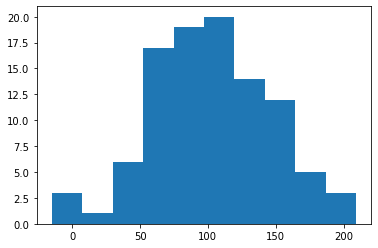

In [7]:
# histogram plot of a small sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = 50 * randn(100) + 100# <-------------***
# histogram
pyplot.hist(data)
pyplot.show()

* Data resolution(해상도) 증가

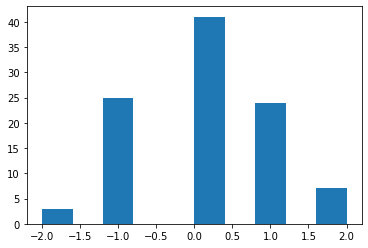

In [8]:
# histogram plot of a low res sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = randn(100)
# remove decimal component
data = data.round(0)# <-------------***
# histogram
pyplot.hist(data)
pyplot.show()

* Extreme values(이상치) 제거

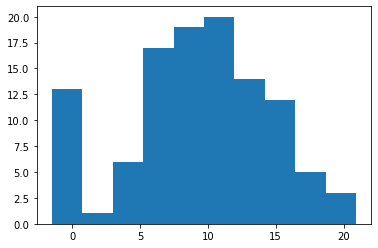

In [9]:
# histogram plot of data with outliers
from numpy.random import seed
from numpy.random import randn
from numpy import zeros
from numpy import append
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = 5 * randn(100) + 10
# add extreme values
data = append(data, zeros(10))# <-------------***
# histogram
pyplot.hist(data)
pyplot.show()

* Long Tails 제거 (threshold 이용)

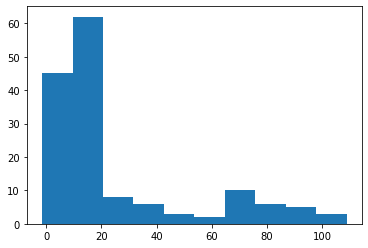

In [10]:
# histogram plot of data with a long tail
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = 5 * randn(100) + 10
tail = 10 + (rand(50) * 100)# <-------------***
# add long tail
data = append(data, tail)
# histogram
pyplot.hist(data)
pyplot.show()

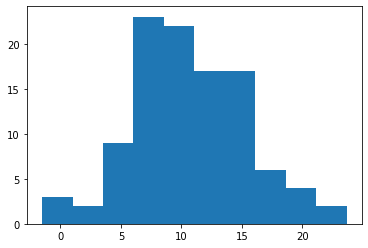

In [11]:
# histogram plot of data with a long tail
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = 5 * randn(100) + 10
tail = 10 + (rand(10) * 100)
# add long tail
data = append(data, tail)
# trim values
data = [x for x in data if x < 25]# <-------------***
# histogram
pyplot.hist(data)
pyplot.show()

* Power transforms 이용 (ex, square root, log-normal)

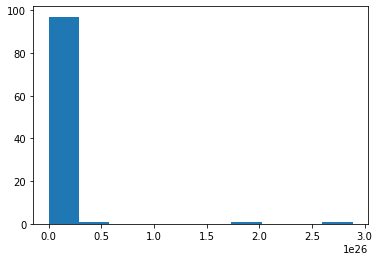

In [12]:
# log-normal distribution
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate two sets of univariate observations
data = 5 * randn(100) + 50
# transform to be exponential
data = exp(data)# <-------------***
# histogram
pyplot.hist(data)
pyplot.show()

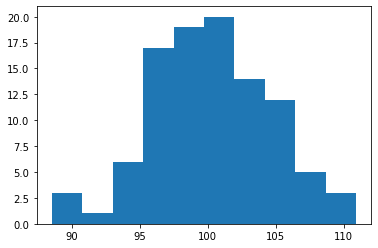

In [13]:
# box-cox transform
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from scipy.stats import boxcox
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate two sets of univariate observations
data = 5 * randn(100) + 100
# transform to be exponential
data = exp(data)
# power transform
data = boxcox(data, 0)# <-------------***
# histogram
pyplot.hist(data)
pyplot.show()

## [실습 2]:  순위상관

* 상관관계가 있는 non-Gaussian data 생성

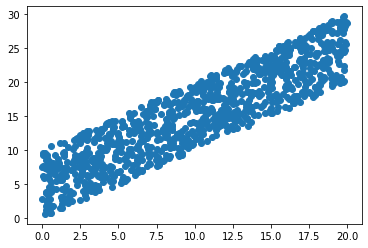

In [14]:
# generate related variables
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)# <-------------***
# plot
pyplot.scatter(data1, data2)
pyplot.show()

* Spearman’s Rank Correlation

In [15]:
# calculate the spearman's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)
# calculate spearman's correlation
coef, p = spearmanr(data1, data2)# <-------------***
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.900
Samples are correlated (reject H0) p=0.000


* Kendall’s Rank Correlation

In [16]:
# calculate the kendall's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import kendalltau
# seed random number generator
seed(1)
# prepare data
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)
# calculate kendall's correlation
coef, p = kendalltau(data1, data2)# <-------------***
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.709
Samples are correlated (reject H0) p=0.000


## [실습 3]:  순위 유의성 검정 (rank significance test)

* Mann-Whitney U Test

In [17]:
# example of the mann-whitney u test
import numpy as np
from numpy.random import seed
from numpy.random import rand
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# generate two independent samples
data1 = np.array([8, 7, 6, 2, 5, 8, 7, 3])
data2 = np.array([9, 8, 7, 8, 10, 9, 6])
# compare samples
stat, p = mannwhitneyu(data1, data2)# <-------------***
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=9.500, p=0.017
Different distribution (reject H0)


* Wilcoxon Signed-Rank Test

In [18]:
# example of the wilcoxon signed-rank test
import numpy as np
from numpy.random import seed
from numpy.random import rand
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate two independent samples
data1 = np.array([33, 17, 30, 25, 36, 25, 31, 20, 18])
data2 = np.array([21, 17, 22, 13, 33, 20, 19, 13, 9])
# compare samples
stat, p = wilcoxon(data1, data2)# <-------------***
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=0.000, p=0.011
Different distribution (reject H0)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


* Kruskal-Wallis H Test

In [19]:
# example of the kruskal-wallis h-test
import numpy as np
from numpy.random import seed
from numpy.random import rand
from scipy.stats import kruskal
# seed the random number generator
seed(1)
# generate three independent samples
data1 = np.array([324, 331, 341, 350, 362, 364, 371, 385, 395, 405])
data2 = np.array([392, 401, 410, 425, 426, 430])
data3 = np.array([325, 390, 432, 435, 440, 441])
# compare samples
stat, p = kruskal(data1, data2, data3)# <-------------***
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=9.232, p=0.010
Different distributions (reject H0)


* Friedman Test

In [20]:
# example of the friedman test
from numpy.random import seed
from numpy.random import rand
from scipy.stats import friedmanchisquare
# seed the random number generator
seed(1)
# generate three independent samples
data1 = np.array([3, 3, 3, 3, 3, 2, 3, 1, 3])
data2 = np.array([2, 2, 1, 1, 2, 3, 1, 3, 2])
data3 = np.array([1, 1, 2, 2, 1, 1, 2, 2, 1])
# compare samples
stat, p = friedmanchisquare(data1, data2, data3)# <-------------***
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=6.889, p=0.032
Different distributions (reject H0)


## 1.2. 다변량 검정

## [실습 4] : Two independent sample test (for vector mean (Iris data))

In [21]:
import numpy as np
import pandas as pd
from sklearn import datasets
from scipy.stats import f

def TwoSampleT2Test(X, Y):
    nx, p = X.shape
    ny, _ = Y.shape
    delta = np.mean(X, axis=0) - np.mean(Y, axis=0)
    Sx = np.cov(X, rowvar=False)
    Sy = np.cov(Y, rowvar=False)
    S_pooled = ((nx-1)*Sx + (ny-1)*Sy)/(nx+ny-2)
    t_squared = (nx*ny)/(nx+ny) * np.matmul(np.matmul(delta.transpose(), np.linalg.inv(S_pooled)), delta)
    statistic = t_squared * (nx+ny-p-1)/(p*(nx+ny-2))
    F = f(p, nx+ny-p-1)
    p_value = 1 - F.cdf(statistic)
    print(f"Test statistic: {statistic}\nDegrees of freedom: {p} and {nx+ny-p-1}\np-value: {p_value}")
    #return statistic, p_value

iris = datasets.load_iris()


versicolor = iris.data[iris.target==1, :]
virginica = iris.data[iris.target==2, :]

TwoSampleT2Test(versicolor, virginica)# <-------------***
## Test statistic: 15.82660099191812
## Degrees of freedom: 2 and 97
## p-value: 1.1259783253558808e-06

Test statistic: 86.14758620895483
Degrees of freedom: 4 and 95
p-value: 1.1102230246251565e-16


# 2. 시계열 분석

## 2.1. 시계열 시각화

## [실습 5]: 시계열 시각화

In [22]:
import os
print(os.getcwd())

C:\Users\Administrator\Desktop\Short_UKJUNG_20210122\SeniorDS_Code_Short_20210219


In [23]:
# Read a time series dataset
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

print(series.head(10))

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
1981-01-07    15.8
1981-01-08    17.4
1981-01-09    21.8
1981-01-10    20.0
Name: Temp, dtype: float64


* 선 그림 (Line plot)

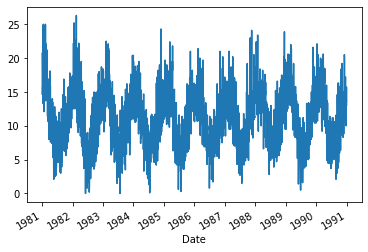

In [24]:
# create a line plot
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

series.plot()# <-------------***
pyplot.show()

* 히스토그램 (Histogram)

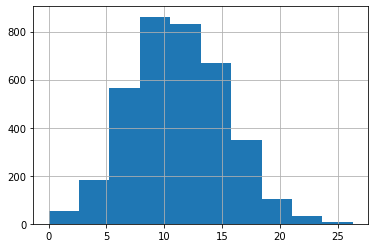

In [25]:
# create a histogram plot
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

series.hist()# <-------------***
pyplot.show()

* 확률밀도 그래프 (Density Plots)

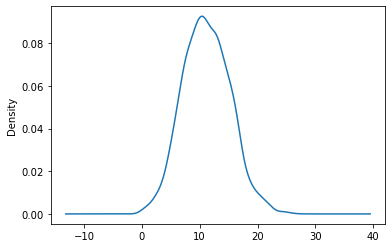

In [26]:
# create a density plot
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

series.plot(kind='kde')# <-------------***
pyplot.show()

* 구간 박스그림 (Box and Whisker Plots by Interval)

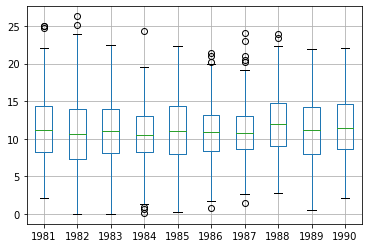

In [27]:
# create a boxplot of yearly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

groups = series.groupby(Grouper(freq='A'))# <-------------***
years = DataFrame()

for name, group in groups:
	years[name.year] = group.values
years.boxplot()# <-------------***
pyplot.show()

* 시차 산점도 (Lag Scatter Plots)

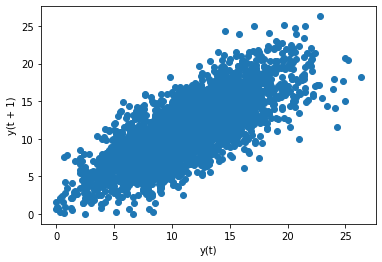

In [28]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot

series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

lag_plot(series)# <-------------***
pyplot.show()

* 다중 시차 산점도 (Multiple Lag Scatter Plots)

<Figure size 432x288 with 0 Axes>

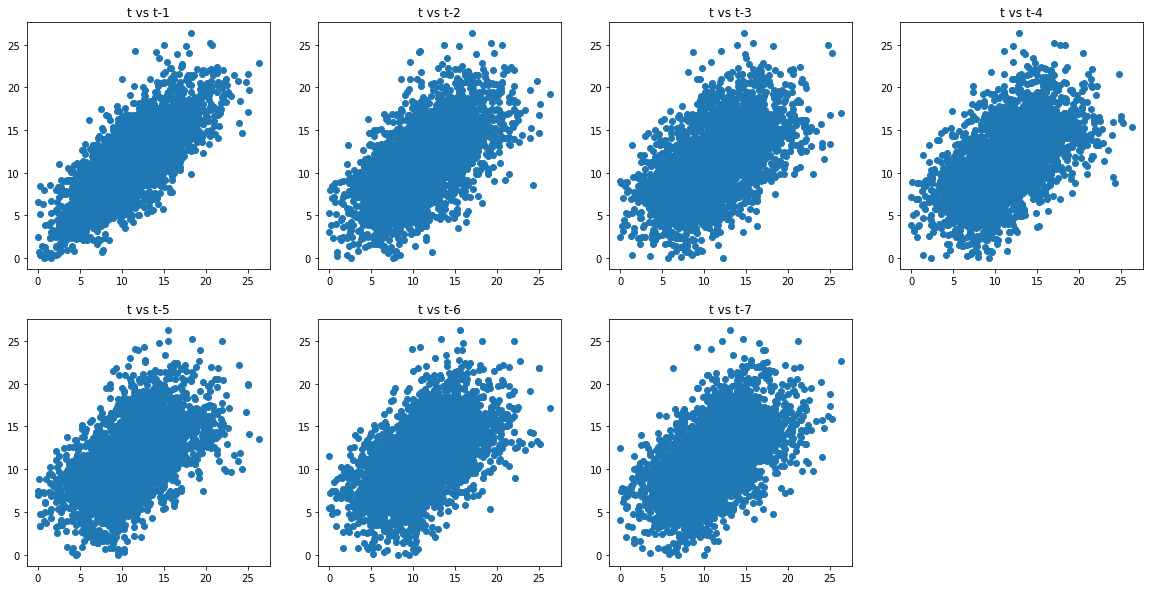

In [29]:
# create multiple scatter plots
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

values = DataFrame(series.values)
lags = 7
columns = [values]

for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t']

for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
pyplot.figure(figsize=(20,10))

for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title('t vs t-' + str(i))
	pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)# <-------------***

pyplot.show()

* 자기상관도(Autocorrelation Plots)

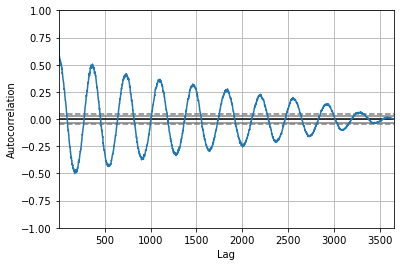

In [30]:
# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

autocorrelation_plot(series)# <-------------***
pyplot.show()

* 백색잡음(white noise)

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


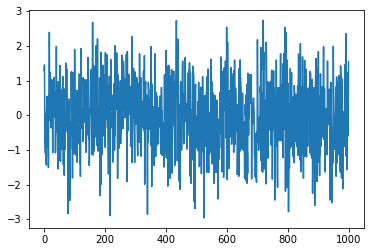

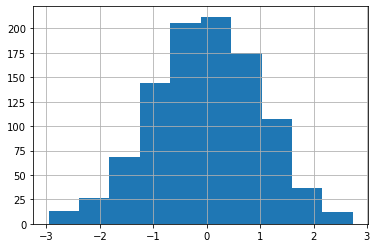

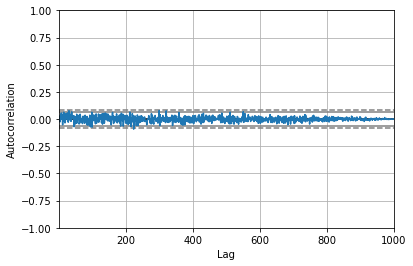

In [31]:
# calculate and plot a white noise series
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

# seed random number generator
seed(1)

# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]# <-------------***
series = Series(series)

# summary stats
print(series.describe())# <-------------***

# line plot
series.plot()# <-------------***
pyplot.show()

# histogram plot
series.hist()# <-------------***
pyplot.show()

# autocorrelation
autocorrelation_plot(series)# <-------------***
pyplot.show()

## 2.2. 시계열 분석의 기본도구

## [실습 6]: 시계열 예측기법의 기본 도구

### 수학적 변환

* Airline Passengers Dataset

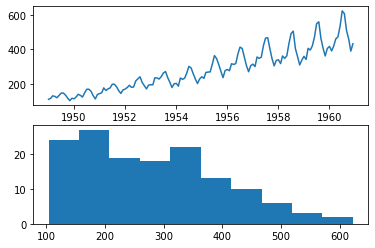

In [32]:
# load and plot a time series
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

pyplot.figure(1)

# line plot
pyplot.subplot(211)
pyplot.plot(series)

# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

* Square Root Transform

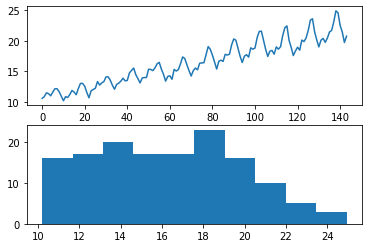

In [33]:
# square root transform a time series
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot

series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])# <-------------***

pyplot.figure(1)

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])

# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

* Log Transform

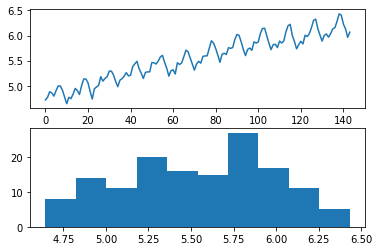

In [34]:
# log transform a time series
from pandas import read_csv
from pandas import DataFrame
from numpy import log
from matplotlib import pyplot

series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])# <-------------***

pyplot.figure(1)

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])

# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

* Box-Cox Transform

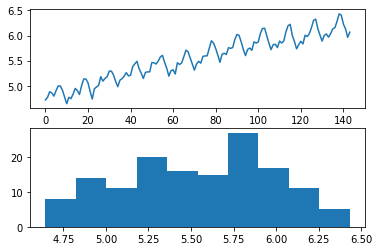

In [35]:
# manually box-cox transform a time series
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot

series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']

dataframe['passengers'] = boxcox(dataframe['passengers'], lmbda=0.0)# <-------------***
pyplot.figure(1)

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])

# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

* Box-Cox Transform: 자동 최적화

Lambda: 0.148023


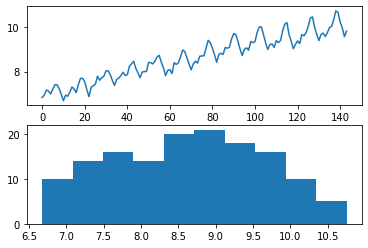

In [36]:
# automatically box-cox transform a time series
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot

series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']

dataframe['passengers'], lam = boxcox(dataframe['passengers'])# <-------------***
print('Lambda: %f' % lam)
pyplot.figure(1)

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])

# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

### 잔차진단

* Daily Female Births Dataset

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64


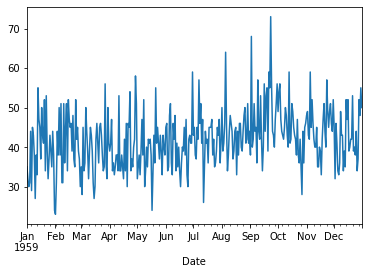

In [37]:
# load the female births dataset
from matplotlib import pyplot
from pandas import read_csv

series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

print(series.head())

series.plot()
pyplot.show()

* 잔차 계산

In [38]:
# calculate residuals from a persistence forecast
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe)

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
predictions = [x for x in test_X]# <-------------***

# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]# <-------------***
residuals = DataFrame(residuals)
print(residuals.head())

        t  t+1
0     NaN   35
1    35.0   32
2    32.0   30
3    30.0   31
4    31.0   44
..    ...  ...
360  34.0   37
361  37.0   52
362  52.0   48
363  48.0   55
364  55.0   50

[365 rows x 2 columns]
      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


* 잔차 그림

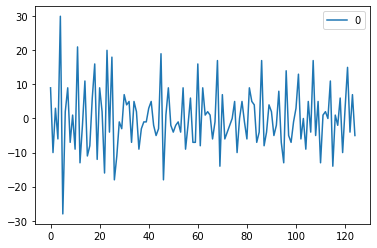

In [39]:
# line plot of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
predictions = [x for x in test_X]

# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)

# plot residuals
residuals.plot()# <-------------***
pyplot.show()

* 잔차 통계량

In [40]:
# summary statistics of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
predictions = [x for x in test_X]

# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)

# summary statistics
print(residuals.describe())# <-------------***

                0
count  125.000000
mean     0.064000
std      9.187776
min    -28.000000
25%     -6.000000
50%     -1.000000
75%      5.000000
max     30.000000


* 잔차 histogram, density plot

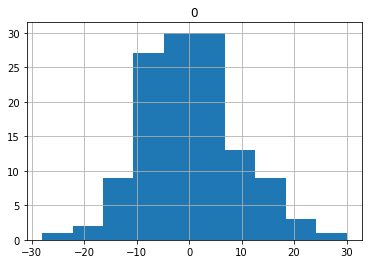

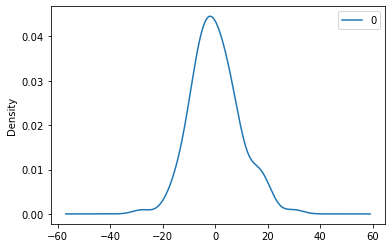

In [41]:
# density plots of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
predictions = [x for x in test_X]

# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)

# histogram plot
residuals.hist()# <-------------***
pyplot.show()

# density plot
residuals.plot(kind='kde')# <-------------***
pyplot.show()

* 잔차 Q-Q plot

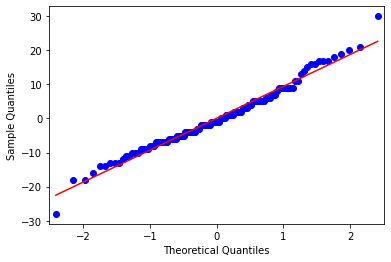

In [42]:
# qq plot of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
import numpy
from statsmodels.graphics.gofplots import qqplot

series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
predictions = [x for x in test_X]

# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = numpy.array(residuals)
qqplot(residuals, line='r')# <-------------***
pyplot.show()

* 잔차 ACF

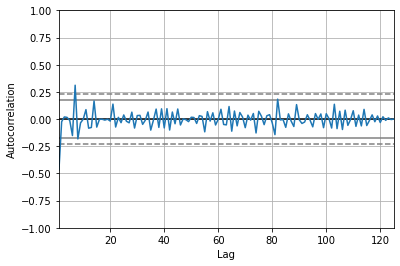

In [43]:
# autoregression plot of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
predictions = [x for x in test_X]

# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)

# autocorrelation plot
autocorrelation_plot(residuals)# <-------------***
pyplot.show()

### 예측 정확도 평가

* Monthly Sunspot dataset

Month
1749-01-01    58.0
1749-02-01    62.6
1749-03-01    70.0
1749-04-01    55.7
1749-05-01    85.0
              ... 
1983-08-01    71.8
1983-09-01    50.3
1983-10-01    55.8
1983-11-01    33.3
1983-12-01    33.4
Name: Sunspots, Length: 2820, dtype: float64


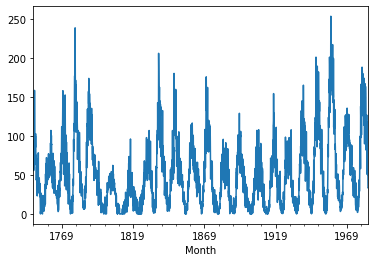

In [44]:
# load the sunspots dataset
from matplotlib import pyplot
from pandas import read_csv

series = read_csv('sunspots.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

print(series)
series.plot()
pyplot.show()

* Training data vs. Test data

Observations: 2820
Training Observations: 1861
Testing Observations: 959


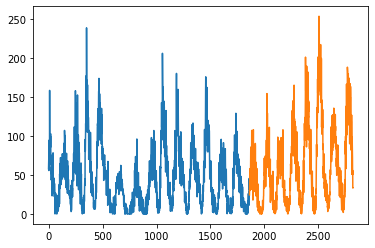

In [45]:
# calculate a train-test split of a time series dataset
from pandas import read_csv

series = read_csv('sunspots.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

X = series.values
train_size = int(len(X) * 0.66)# <-------------***
train, test = X[0:train_size], X[train_size:len(X)]# <-------------***

print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

* 측도: MAE, RMSE

In [46]:
# calculate mean absolute error
from sklearn.metrics import mean_absolute_error

expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]

mae = mean_absolute_error(expected, predictions)# <-------------***

print('MAE: %f' % mae)

MAE: 0.140000


In [47]:
# calculate root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt

expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]

mse = mean_squared_error(expected, predictions)# <-------------***

rmse = sqrt(mse)

print('RMSE: %f' % rmse)

RMSE: 0.148324


* Walk Forward Validation

In [48]:
# walk forward evaluation model for time series data
from pandas import read_csv

series = read_csv('sunspots.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

X = series.values
n_train = 500
n_records = len(X)

for i in range(n_train, n_records):
	train, test = X[0:i], X[i:i+1]# <-------------***
	print('train=%d, test=%d' % (len(train), len(test)))

train=500, test=1
train=501, test=1
train=502, test=1
train=503, test=1
train=504, test=1
train=505, test=1
train=506, test=1
train=507, test=1
train=508, test=1
train=509, test=1
train=510, test=1
train=511, test=1
train=512, test=1
train=513, test=1
train=514, test=1
train=515, test=1
train=516, test=1
train=517, test=1
train=518, test=1
train=519, test=1
train=520, test=1
train=521, test=1
train=522, test=1
train=523, test=1
train=524, test=1
train=525, test=1
train=526, test=1
train=527, test=1
train=528, test=1
train=529, test=1
train=530, test=1
train=531, test=1
train=532, test=1
train=533, test=1
train=534, test=1
train=535, test=1
train=536, test=1
train=537, test=1
train=538, test=1
train=539, test=1
train=540, test=1
train=541, test=1
train=542, test=1
train=543, test=1
train=544, test=1
train=545, test=1
train=546, test=1
train=547, test=1
train=548, test=1
train=549, test=1
train=550, test=1
train=551, test=1
train=552, test=1
train=553, test=1
train=554, test=1
train=555,

## 2.3. ARIMA model

## [실습 7]: Differencing, Stationarity test

* Shampoo Sales dataset

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales, dtype: float64


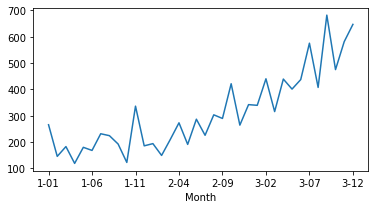

In [49]:
# load the shampoo sales dataset
from matplotlib import pyplot
from pandas import read_csv

series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

print(series.head())

pyplot.figure(figsize=(6,3))
series.plot()
pyplot.show()

* Detrend Shampoo data using differencing

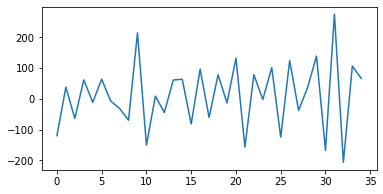

In [50]:
# detrend a time series using differencing
import numpy as np
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, index_col=0, 
                  parse_dates=True, squeeze=True, date_parser=parser)

X = series.values

diff=list()
for i in range(1, len(X)):
	value = X[i] - X[i - 1]    # <-------------***
	diff.append(value)

pyplot.figure(figsize=(6,3))
pyplot.plot(diff)
pyplot.show()

* Minimum Daily Temperatures dataset

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


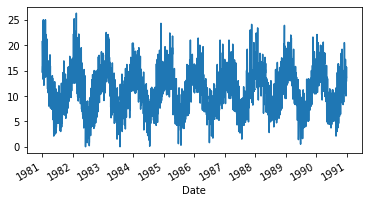

In [51]:
# load the minimum temperatures dataset
from matplotlib import pyplot
from pandas import read_csv

series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

print(series.head())

pyplot.figure(figsize=(6,3))
series.plot()
pyplot.show()

* Deseasonalize a temperatures data using seasonal differencing

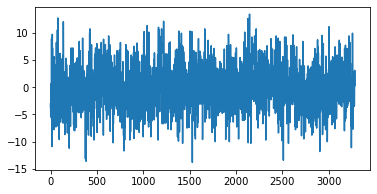

In [52]:
# deseasonalize a time series using differencing
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

X = series.values

diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
	value = X[i] - X[i - days_in_year]    # <-------------***
	diff.append(value)

pyplot.figure(figsize=(6,3))
pyplot.plot(diff)
pyplot.show()

### 단위근 검정

* Daily Female Births dataset

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64


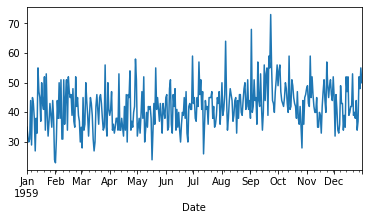

In [53]:
# load the female births dataset
from matplotlib import pyplot
from pandas import read_csv

series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

print(series.head())

pyplot.figure(figsize=(6,3))
series.plot()
pyplot.show()

* Augmented Dickey-Fuller test(Stationary)

In [54]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values

# Augmented Dickey-Fuller test for non-stationarity check
result = adfuller(X)  # <-------------***

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


* Airline Passengers dataset(Non-stationary)

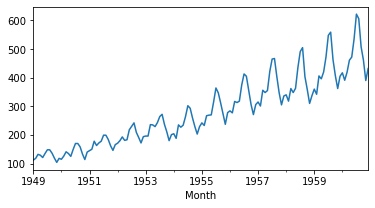

In [55]:
# load time series data
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

pyplot.figure(figsize=(6,3))
series.plot()
pyplot.show()

* Augmented Dickey-Fuller test

In [56]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values

# Augmented Dickey-Fuller test for non-stationarity check
result = adfuller(X)  # <-------------***

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


## [실습 8] 비계절성 ARIMA 모델

* Shampoo Sales dataset

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales, dtype: float64


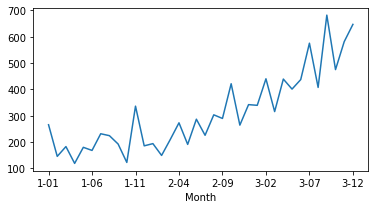

In [57]:
# load the shampoo sales dataset
from matplotlib import pyplot
from pandas import read_csv

series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

print(series.head())

pyplot.figure(figsize=(6,3))
series.plot()
pyplot.show()

* 날짜 parsing

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


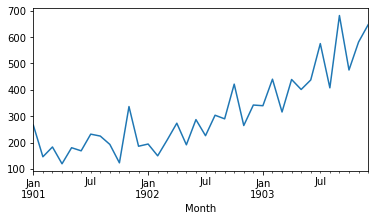

In [58]:
# load and plot dataset
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, 
                  date_parser=parser)     # <-------------***

# summarize first few rows
print(series.head())

# line plot
pyplot.figure(figsize=(6,3))
series.plot()
pyplot.show()

* ACF plot

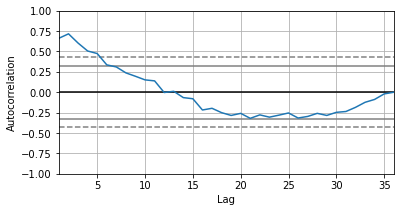

In [59]:
# autocorrelation plot of time series
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, 
                  date_parser=parser)

# autocorrelation plot
pyplot.figure(figsize=(6,3))
autocorrelation_plot(series)   # <-------------***
pyplot.show()

* ARIMA(5,1,0)

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Wed, 08 Sep 2021   AIC                            408.969
Time:                        17:16:24   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

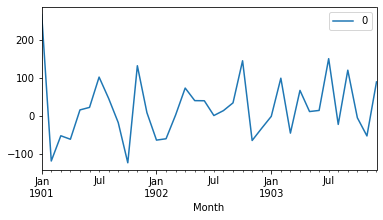

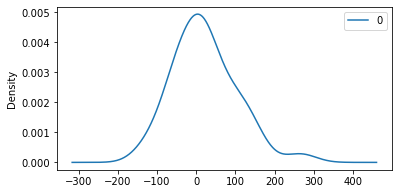

                0
count   36.000000
mean    21.936145
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [60]:
# fit an ARIMA model and plot residual errors
from datetime import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, 
                  date_parser=parser)
series.index = series.index.to_period('M')

# fit model
model = ARIMA(series, order=(5,1,0))   # <-------------***
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot(figsize=(6,3))
pyplot.show()

# density plot of residuals
residuals.plot(kind='kde', figsize=(6,3))
pyplot.show()

# summary stats of residuals
print(residuals.describe())

* Evaluate an ARIMA(5,1,0) using a walk-forward validation

predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231274, expected=475.300000
predicted=672.914943, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


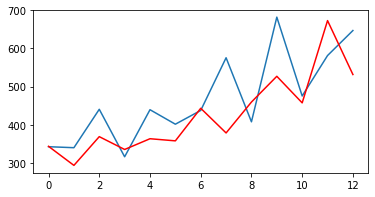

In [61]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, 
                  date_parser=parser)
series.index = series.index.to_period('M')

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation     # <-------------***
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.figure(figsize=(6,3))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

* Grid Search ARIMA model Hyperparameters (Shampoo Sales dataset)

In [62]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Evaluate an ARIMA model for a given order (p,d,q)    # <-------------***
def evaluate_arima_model(X, arima_order):
	# Prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	
    # Make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	
    # Calculate sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# Evaluate combinations of p, d and q values for an ARIMA model   # <-------------***
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# Load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, 
                  date_parser=parser)

# Evaluate parameters
p_values = [0, 1, 2, 4]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")   # <-------------***
evaluate_models(series.values, p_values, d_values, q_values)   # <-------------***

ARIMA(0, 0, 0) RMSE=228.966
ARIMA(0, 0, 1) RMSE=195.596
ARIMA(0, 0, 2) RMSE=154.886
ARIMA(0, 1, 0) RMSE=133.156
ARIMA(0, 1, 1) RMSE=104.077
ARIMA(0, 1, 2) RMSE=68.345
ARIMA(0, 2, 0) RMSE=255.187
ARIMA(0, 2, 1) RMSE=134.168
ARIMA(0, 2, 2) RMSE=74.643
ARIMA(1, 0, 0) RMSE=152.028
ARIMA(1, 0, 1) RMSE=111.787
ARIMA(1, 0, 2) RMSE=77.074
ARIMA(1, 1, 0) RMSE=88.631
ARIMA(1, 1, 1) RMSE=87.942
ARIMA(1, 1, 2) RMSE=90.986
ARIMA(1, 2, 0) RMSE=134.576
ARIMA(1, 2, 1) RMSE=86.157
ARIMA(1, 2, 2) RMSE=65.511
ARIMA(2, 0, 0) RMSE=100.879
ARIMA(2, 0, 1) RMSE=98.953
ARIMA(2, 0, 2) RMSE=98.690
ARIMA(2, 1, 0) RMSE=85.063
ARIMA(2, 1, 1) RMSE=88.428
ARIMA(2, 1, 2) RMSE=83.496
ARIMA(2, 2, 0) RMSE=97.829
ARIMA(2, 2, 1) RMSE=76.847
ARIMA(2, 2, 2) RMSE=80.808
ARIMA(4, 0, 0) RMSE=100.975
ARIMA(4, 0, 1) RMSE=101.462
ARIMA(4, 0, 2) RMSE=97.103
ARIMA(4, 1, 0) RMSE=95.068
ARIMA(4, 1, 1) RMSE=84.819
ARIMA(4, 1, 2) RMSE=84.204
ARIMA(4, 2, 0) RMSE=85.397
ARIMA(4, 2, 1) RMSE=74.219
ARIMA(4, 2, 2) RMSE=70.147
Best ARIMA(1, 2

* Forecast Confidence Interval  (Shampoo Sales dataset)

In [63]:
# Summarize the confidence interval on an ARIMA forecast

from datetime import datetime
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

# Split into train and test sets
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]
print('# of train=', len(train))
print('# of test=', len(test))

# Fit an ARIMA model
model = ARIMA(train, order=(1,2,2))    # <-------------***
model_fit = model.fit()

# Forecast
result = model_fit.get_forecast()   # <-------------***

# Summarize forecast 
print('Forcased value (yhat): %.3f' % result.predicted_mean)
print('Actual value (y): %.3f' % test[0])
print('Standard Error: %.3f' % result.se_mean)

# Confidence intervals
ci = result.conf_int(0.05)   # <-------------***
print('95%% Interval: %.3f to %.3f' % (ci[0,0], ci[0,1]))

# of train= 35
# of test= 1
Forcased value (yhat): 600.640
Actual value (y): 646.900
Standard Error: 61.542
95% Interval: 480.021 to 721.259


## 2.4. 동적 회귀모델

## [실습 9] ARIMA 모델 정리



### AR 
* The autoregression (AR) method models the next step in the sequence 
as a linear function of the observations at prior time steps.

* The notation for the model involves specifying the order of the model p 
as a parameter to the AR function, 
e.g. AR(p). For example, AR(1) is a first-order autoregression model.

* The method is suitable for univariate time series 
without trend and seasonal components.


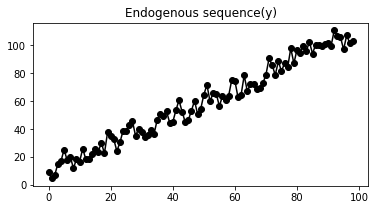

y_hat= [102.54972006]


In [64]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from random import random

# contrived dataset
data = [x + 20*random() for x in range(1, 100)]

# show the dataset
pyplot.figure(figsize=(6,3))
plt.plot(data, 'k-o')
plt.title('Endogenous sequence(y)')
plt.show()

# fit model
#model = AutoReg(data, lags=1) # <-------------***
model = ARIMA(data, order=(1, 0, 0)) # <-------------***
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data)) # <-------------***
print('y_hat=',yhat)



### MA 
* The moving average (MA) method models the next step in the sequence 
as a linear function of the residual errors from a mean process 
at prior time steps.

* A moving average model is different from calculating the moving average 
of the time series.

* The notation for the model involves specifying the order of the model q 
as a parameter to the MA function, 
e.g. MA(q). For example, MA(1) is a first-order moving average model.

* The method is suitable for univariate time series 
without trend and seasonal components.


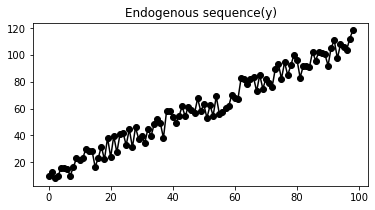

y_hat= [86.43740221]


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from random import random

# contrived dataset
data = [x + 20*random() for x in range(1, 100)]

# show the dataset
pyplot.figure(figsize=(6,3))
plt.plot(data, 'k-o')
plt.title('Endogenous sequence(y)')
plt.show()

# fit model
model = ARIMA(data, order=(0, 0, 1))# <-------------***
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data))
print('y_hat=',yhat)

### ARMA 
* The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and residual errors at prior time steps.

* It combines both Autoregression (AR) and Moving Average (MA) models.

* The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.

* The method is suitable for univariate time series without trend and seasonal components.


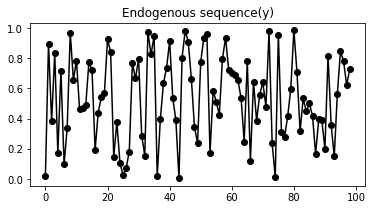

y_hat= [0.51882947]


In [66]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from random import random

# contrived dataset
data = [random() for x in range(1, 100)]

# show the dataset
pyplot.figure(figsize=(6,3))
plt.plot(data, 'k-o')
plt.title('Endogenous sequence(y)')
plt.show()

# fit model
model = ARIMA(data, order=(2, 0, 1))# <-------------***
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data))
print('y_hat=',yhat)

### ARIMA 

* The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.

* It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).

* The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.

* The method is suitable for univariate time series with trend and without seasonal components.

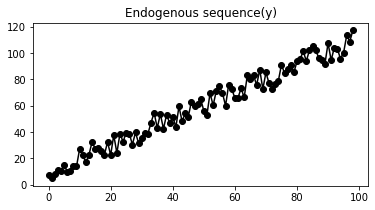

y_hat= [111.76377471]


In [67]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from random import random

# contrived dataset
data = [x + 20*random() for x in range(1, 100)]

# show the dataset
pyplot.figure(figsize=(6,3))
plt.plot(data, 'k-o')
plt.title('Endogenous sequence(y)')
plt.show()

# fit model
model = ARIMA(data, order=(1, 1, 1))# <-------------***
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print('y_hat=',yhat)

 
### SARIMA 
* The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

* It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

* The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period). A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.

* The method is suitable for univariate time series with trend and/or seasonal components.

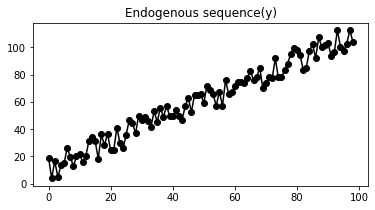

y_hat= [105.65695427]


In [68]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

# contrived dataset
data = [x + 20*random() for x in range(1, 100)]

# show the dataset
pyplot.figure(figsize=(6,3))
plt.plot(data, 'k-o')
plt.title('Endogenous sequence(y)')
plt.show()

# fit model
model = SARIMAX(data, order=(1, 1, 1), 
                seasonal_order=(0, 0, 0, 0)) # <-------------***
model_fit = model.fit(disp=True)

# make prediction
yhat = model_fit.predict(len(data), len(data))
print('y_hat=',yhat)


### SARIMAX 

* The Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) is an extension of the SARIMA model that also includes the modeling of exogenous variables.

* Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series may be referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

* The SARIMAX method can also be used to model the subsumed models with exogenous variables, such as ARX, MAX, ARMAX, and ARIMAX.

* The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.

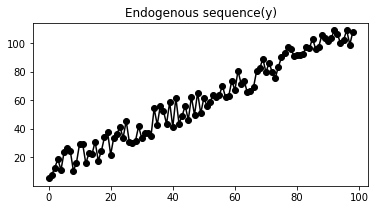

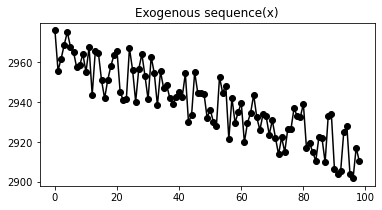

Observed value of Exogenous variable (x)= [200.01873790183305]
y_hat= [118.71427358]


In [69]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

# contrived dataset
data1 = [x + 20*random() for x in range(1, 100)]
data2 = [-0.5*x + 3000 + 30*random() for x in range(101, 200)] # <-------------***

# show the dataset of endogenous sequence(y)
pyplot.figure(figsize=(6,3))
plt.plot(data1, 'k-o')
plt.title('Endogenous sequence(y)')
plt.show()

# show the dataset of exogenous sequence(x)
pyplot.figure(figsize=(6,3))
plt.plot(data2, 'k-o')
plt.title('Exogenous sequence(x)')
plt.show()

# fit model
model = SARIMAX(data1, 
                exog=data2, # <-------------***
                order=(1, 1, 1), 
                seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# make prediction
exog2 = [200 + random()]
yhat = model_fit.predict(len(data1), len(data1), exog=[exog2]) # <-------------***
print('Observed value of Exogenous variable (x)=',exog2)
print('y_hat=',yhat)


### VAR 

* The Vector Autoregression (VAR) method models the next step in each time series using an AR model. It is the generalization of AR to multiple parallel time series, e.g. multivariate time series.

* The notation for the model involves specifying the order for the AR(p) model as parameters to a VAR function, e.g. VAR(p).

* The method is suitable for multivariate time series without trend and seasonal components.

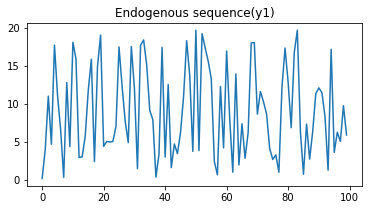

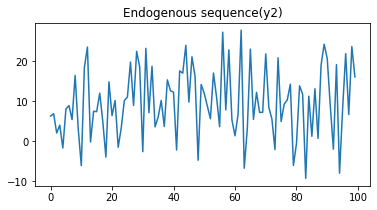

y1_hat= 9.448338185252236
y2_hat= 8.828602445860797


In [70]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = 20*random()   # <-------------***
    v2 = -0.5*v1 + 30*random() # <-------------***
    row = [v1, v2]
    data.append(row)

df=pd.DataFrame(data)   

# show the dataset of endogenous sequence(y1)
pyplot.figure(figsize=(6,3))
df[0].plot()
plt.title('Endogenous sequence(y1)')
plt.show()

# show the dataset of endogenous sequence(y2)
pyplot.figure(figsize=(6,3))
df[1].plot()
plt.title('Endogenous sequence(y2)')
plt.show()
    
# fit model
model = VAR(data) # <-------------***
model_fit = model.fit()

# make prediction
yhat = model_fit.forecast(model_fit.y, steps=1)
print('y1_hat=',yhat[0,0])
print('y2_hat=',yhat[0,1])

### VARMA 

* The Vector Autoregression Moving-Average (VARMA) method models the next step in each time series using an ARMA model. It is the generalization of ARMA to multiple parallel time series, e.g. multivariate time series.

* The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to a VARMA function, e.g. VARMA(p, q). A VARMA model can also be used to develop VAR or VMA models.

* The method is suitable for multivariate time series without trend and seasonal components.

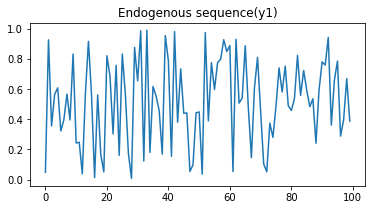

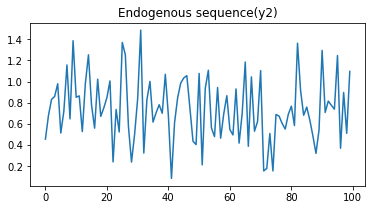

y1_hat= 0.4632544359022517
y2_hat= 0.7171868290901555


In [71]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.varmax import VARMAX
from random import random

# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random() # <-------------***
    v2 = 0.5*v1 + random() # <-------------***
    row = [v1, v2]
    data.append(row)

# show the dataset of endogenous sequence(y1)
df = pd.DataFrame(data)
pyplot.figure(figsize=(6,3))
df[0].plot()
plt.title('Endogenous sequence(y1)')
plt.show()

# show the dataset of endogenous sequence(y2)
pyplot.figure(figsize=(6,3))
df[1].plot()
plt.title('Endogenous sequence(y2)')
plt.show()    
    
# fit model
model = VARMAX(data, order=(1, 1)) # <-------------***
model_fit = model.fit(disp=False)

# make prediction
yhat = model_fit.forecast()
print('y1_hat=',yhat[0,0])
print('y2_hat=',yhat[0,1])


### VARMAX 

* The Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX) is an extension of the VARMA model that also includes the modeling of exogenous variables. It is a multivariate version of the ARMAX method.

* Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series(es) are referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

* The VARMAX method can also be used to model the subsumed models with exogenous variables, such as VARX and VMAX.

* The method is suitable for multivariate time series without trend and seasonal components with exogenous variables.

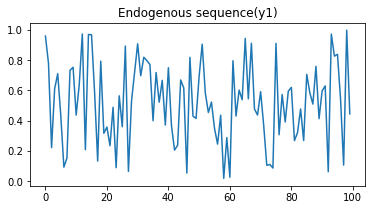

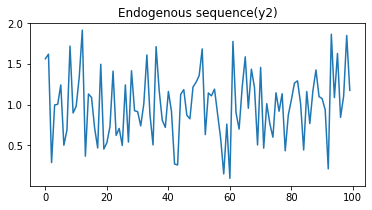

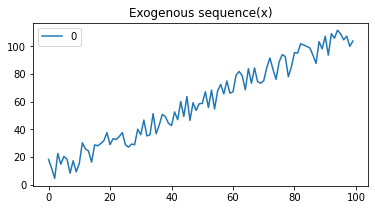

x= 100
y1_hat= 0.50189916117857
y2_hat= 1.0428078971068664


In [72]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.varmax import VARMAX
from random import random

# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random() # <-------------***
    v2 = v1 + random() # <-------------***
    row = [v1, v2]
    data.append(row)
data_exog = [x + 20*random() for x in range(100)] # <-------------***

# show the dataset of endogenous sequence(y1)
df = pd.DataFrame(data)
pyplot.figure(figsize=(6,3))
df[0].plot()
plt.title('Endogenous sequence(y1)')
plt.show()

# show the dataset of endogenous sequence(y2)
pyplot.figure(figsize=(6,3))
df[1].plot()
plt.title('Endogenous sequence(y2)')
plt.show()   

# show the dataset of exogenous sequence(x)
df_exog = pd.DataFrame(data_exog)
df_exog.plot(figsize=(6,3))
plt.title('Exogenous sequence(x)')
plt.show()

# fit model
model = VARMAX(data, exog=data_exog, order=(1, 1)) # <-------------***
model_fit = model.fit(disp=False)

# make prediction
data_exog2 = [[100]]
yhat = model_fit.forecast(exog=data_exog2)
print('x=',data_exog2[0][0])
print('y1_hat=',yhat[0,0])
print('y2_hat=',yhat[0,1])

# 3. 이상치 탐지 (Outlier detection)

## 3.1. 단변량 데이터의 이상치 탐지

## [실습 10] 단변량 데이터의 이상치 탐지

#### 단변량(univariate) 데이터의 이상치 탐지

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False ## 마이나스 '-' 표시 제대로 출력
 
from scipy.stats import t
from statsmodels.formula.api import ols
 
df = pd.read_csv('body_fat_data_reduced.csv')

new_data = {'Tricep_ST':17,   # <-------------*** outlier 생성
            'Thigh_C':53,
            'Body_fat':45}

df = df.append(new_data, ignore_index=True) # <-------------***

print(df)

print('\n ### Body fat data 정보 ###  \n')
print(df.info())

    Tricep_ST  Thigh_C  Body_fat
0        19.5     43.1      11.9
1        24.7     49.8      22.8
2        30.7     51.9      18.7
3        29.8     54.3      20.1
4        19.1     42.2      12.9
5        25.6     53.9      21.7
6        31.4     58.5      27.1
7        27.9     52.1      25.4
8        22.1     49.9      21.3
9        25.5     53.5      19.3
10       31.1     56.6      25.4
11       30.4     56.7      27.2
12       18.7     46.5      11.7
13       19.7     44.2      17.8
14       14.6     42.7      12.8
15       29.5     54.4      23.9
16       27.7     55.3      22.6
17       30.2     58.6      25.4
18       22.7     48.2      14.8
19       25.2     51.0      21.1
20       17.0     53.0      45.0

 ### Body fat data 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tricep_ST  21 non-null     float64
 1   Thigh_C    21 non

* Z-score

In [74]:
import numpy as np

list = np.array(df['Body_fat'].tolist())


def outliers_z_score(ys):
    threshold = 3
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys] # <-------------***
    return np.where(np.abs(z_scores) > threshold)

print(outliers_z_score(list))# <-------------***

(array([20], dtype=int64),)


* Modified Z-score

In [75]:
import numpy as np

list = np.array(df['Body_fat'].tolist())

def outliers_modified_z_score(ys):
    threshold = 3.5
    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y   # <-------------***
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

print(outliers_modified_z_score(list))# <-------------***

(array([20], dtype=int64),)


* IQR(inter-quartile range)를 이용한 이상치 탐지

(array([20], dtype=int64),)


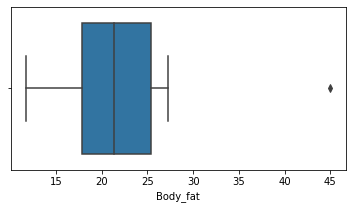

In [76]:
import numpy as np
import seaborn as sns
list = np.array(df['Body_fat'].tolist())

def outliers_iqr(ys):  # <-------------***
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

pyplot.figure(figsize=(6,3))
ax=sns.boxplot(x=df['Body_fat'] )

print(outliers_iqr(list))  # <-------------***

## 3.2. 다변량 데이터의 이상치 탐지

## [실습 11] 다변량 데이터의 이상치 탐지

* 레버리지 (Leverage) in Regression diagnostics

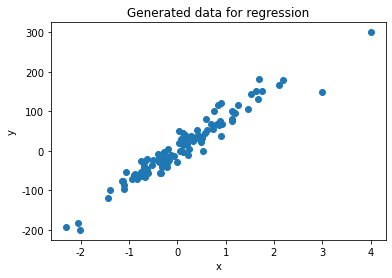

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression

# 100개의 데이터 생성
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                              coef=True, random_state=1)

# 레버리지가 높은 가상의 데이터 2개를 추가
data_100 = (4, 300)
data_101 = (3, 150)
X0 = np.vstack([X0, np.array([data_100[:1], data_101[:1]])])
X = sm.add_constant(X0)
y = np.hstack([y, [data_100[1], data_101[1]]])

plt.scatter(X0, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generated data for regression")
plt.show()

In [78]:
# 총 102개의 데이터포인트를 사용하여 회귀분석 실시
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           1.61e-61
Time:                        17:17:33   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

Sum of leverage:  2.0000000000000004
Number of data points:  102
Ave of leverage:  0.019607843137254905


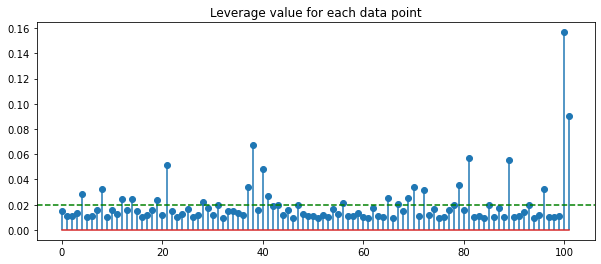

In [79]:
# Leverage 계산

influence = result.get_influence()
hat = influence.hat_matrix_diag  # <-------------***

print('Sum of leverage: ', hat.sum())
print('Number of data points: ', len(hat))
print('Ave of leverage: ', hat.sum()/len(hat))  # <-------------***
      
plt.figure(figsize=(10, 4))
plt.stem(hat)
plt.axhline(hat.sum()/len(hat), c="g", ls="--")
plt.title("Leverage value for each data point")
plt.show()

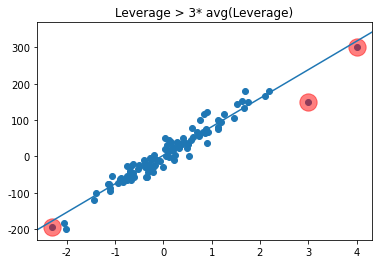

In [80]:
# Leverage가 임계값 보다 큰값 표시
ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 3* hat.sum()/len(hat)  # <-------------***
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.title("Leverage > 3* avg(Leverage)")
plt.show()

* Standardised residual(표준화 잔차) in Regression diagnostics

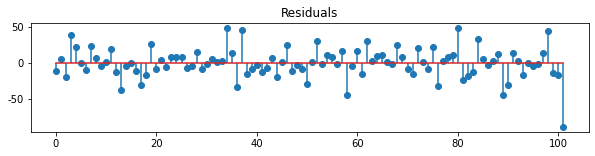

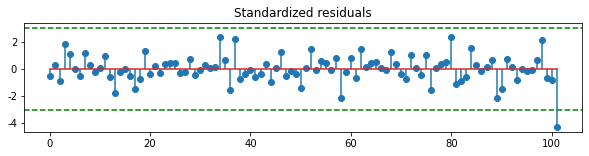

In [81]:
# Residual 그림
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.title("Residuals")
plt.show()

# Standardised residual 그림
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)  # <-------------***
plt.axhline(3, c="g", ls="--")
plt.axhline(-3, c="g", ls="--")
plt.title("Standardized residuals")
plt.show()

* Cook’s distance in Regression diagnostics

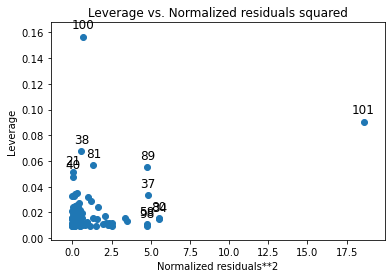

In [82]:
# (방법 1) Cook's distance가 큰값을 갖는 데이터포인트의 index 표시 
sm.graphics.plot_leverage_resid2(result)  # <-------------***
plt.show()

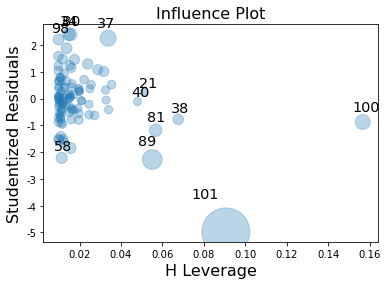

In [83]:
# (방법 2) Cook's distance가 큰값을 갖는 데이터포인트의 index와 값의 크기를 bubble로 표시 
sm.graphics.influence_plot(result, plot_alpha=0.3)  # <-------------***
plt.show()

Index of outliers:  [ 34  37  80  81  89 100 101]


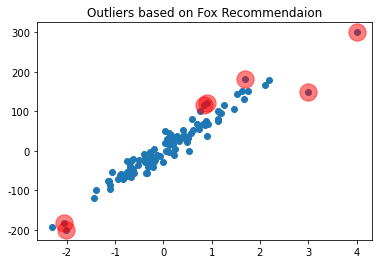

In [87]:
from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(y) - K - 1)  # <-------------***
idx = np.where(cooks_d2 > fox_cr)[0]  # <-------------***

ax = plt.subplot()
plt.scatter(X0, y)
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)

print('Index of outliers: ', idx)  # <-------------***
plt.title("Outliers based on Fox Recommendaion")
plt.show()

* Mahalanobis (마할라노비스) Distance

In [88]:
import numpy as np
import pandas as pd 
import scipy as stats

data = {'score': [91, 93, 72, 87, 86, 73, 68, 87, 78, 99, 95, 76, 84, 96, 76, 80, 83, 84, 73, 74],
        'hours': [16, 6, 3, 1, 2, 3, 2, 5, 2, 5, 2, 3, 4, 3, 3, 3, 4, 3, 4, 4],
        'prep': [3, 4, 0, 3, 4, 0, 1, 2, 1, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2],
        'grade': [70, 88, 80, 83, 88, 84, 78, 94, 90, 93, 89, 82, 95, 94, 81, 93, 93, 90, 89, 89]
        }

df = pd.DataFrame(data,columns=['score', 'hours', 'prep','grade'])
df.head()

,score,hours,prep,grade
0,91,16,3,70
1,93,6,4,88
2,72,3,0,80
3,87,1,3,83
4,86,2,4,88


In [89]:
from scipy.stats import chi2

#create function to calculate Mahalanobis distance
def mahalanobis(x=None, data=None, cov=None):  # <-------------***
    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

#create new column in dataframe that contains Mahalanobis distance for each row
df['mahalanobis'] = mahalanobis(x=df, data=df[['score', 'hours', 'prep', 'grade']])  # <-------------***

#calculate p-value for each mahalanobis distance 
df['p'] = 1 - chi2.cdf(df['mahalanobis'], 3)

#display first five rows of dataframe
df.head(20)

,score,hours,prep,grade,mahalanobis,p
0,91,16,3,70,16.501963,0.000895
1,93,6,4,88,2.639286,0.450644
2,72,3,0,80,4.850797,0.183054
3,87,1,3,83,5.201261,0.157639
4,86,2,4,88,3.828734,0.280562
5,73,3,0,84,4.090563,0.251850
6,68,2,1,78,4.283630,0.232421
7,87,5,2,94,2.419874,0.489946
8,78,2,1,90,1.651958,0.647667
9,99,5,2,93,5.657825,0.129498


* LOF (Local Outlier Factor)

predicted: -1(abnoral) or 1(normal))
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1
 -1 -1 -1  1]


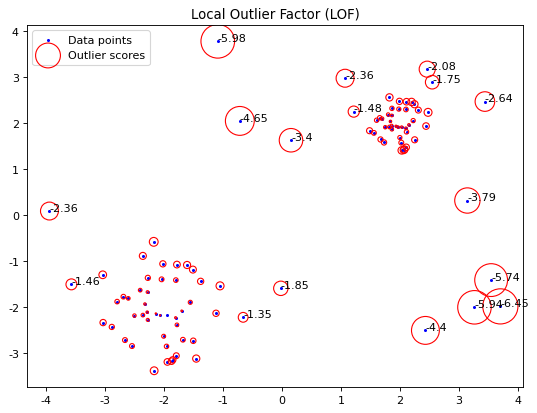

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(40, 2)#정규분포에서 40*2만들고
X_inliers = np.r_[X_inliers + 2, 2*X_inliers - 2]#각각 2,2 혹은 -2,-2만큼 평행이동한거를 vstack. 즉 cluster 2개

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]#-4,4에서 뽑은 outlier와 inlier를 vstack

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1) # <-------------***
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict, decision_function and score_samples methods).

y_pred = clf.fit_predict(X) #1,-1로 나온다.
print('predicted: -1(abnoral) or 1(normal))')
print(y_pred)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_


#fig, ax = plt.subplots()
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='b', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min()) # minmax scaling으로 radius를 정함
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
n=np.copy(X_scores)
n[n>-1.3]=np.nan
n=np.round(n,2)
for i, txt in enumerate(n):
    if np.isnan(txt):continue
    plt.annotate(txt, (X[i,0], X[i,1]))
legend = plt.legend(loc='upper left')
plt.show()

* Isolation Forest

1) The return value of score_samples is $-s(x,\psi)$ , which range is $[-1,0]$, -1 means decision length is short so abnomal.

2) Decision_function will convert score_samples to $[-0.5,0.5]$

3) Then predict will convert decision_function to $-1$(abnormal) or $1$(normal) by predefined anomaly rate(contamination)

<Scatter plot of Original data>


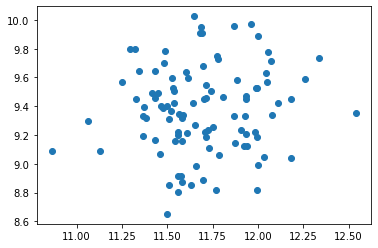

IsolationForest(contamination=0.05)
Predicted : -1(=abnormal) or 1(=normal)
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


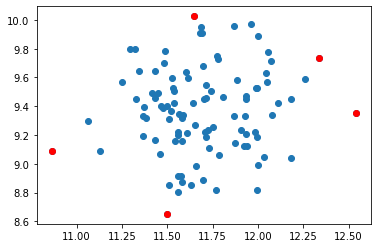

In [91]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

random.seed(3)
x, _ = make_blobs(n_samples=100, centers=1, cluster_std=.3, center_box=(20, 5))

print('<Scatter plot of Original data>')
plt.scatter(x[:,0], x[:,1])
plt.show() 
 
    
############ 방법 1: Threshold 지정
# The amount of contamination of the data set, i.e. the proportion of outliers in the data set.
iforest = IsolationForest(n_estimators=100, contamination=.05)  # <-------------***
print(iforest)
 
pred = iforest.fit_predict(x) 
print('Predicted : -1(=abnormal) or 1(=normal)')
print(pred) 
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show() 


IsolationForest()
Scores :
[-0.41855971 -0.50208199 -0.44806248 -0.4370635  -0.46814733 -0.4248523
 -0.42572283 -0.40633666 -0.49927017 -0.47087458 -0.57190569 -0.53926647
 -0.41755572 -0.41820815 -0.61363443 -0.39940078 -0.56619568 -0.57779241
 -0.46998083 -0.43896269 -0.47733339 -0.55244544 -0.47372816 -0.43756761
 -0.41782579 -0.43391161 -0.47943153 -0.68843046 -0.61666527 -0.44080039
 -0.47594508 -0.46041314 -0.40645518 -0.50274228 -0.40826253 -0.47914843
 -0.43184381 -0.41145892 -0.44232235 -0.4162493  -0.40503622 -0.61648357
 -0.50026902 -0.46255507 -0.43596903 -0.40452016 -0.65706114 -0.50997008
 -0.43760248 -0.42190611 -0.44381195 -0.48637863 -0.44422653 -0.49794823
 -0.40814724 -0.42689417 -0.46187599 -0.49874648 -0.50504797 -0.49445981
 -0.40354438 -0.40889501 -0.49342688 -0.52117203 -0.40156958 -0.56267039
 -0.5439196  -0.42483499 -0.59196059 -0.43482054 -0.40884699 -0.54799495
 -0.49933598 -0.42880349 -0.49753985 -0.42991439 -0.41733787 -0.50234822
 -0.44927968 -0.48711297 

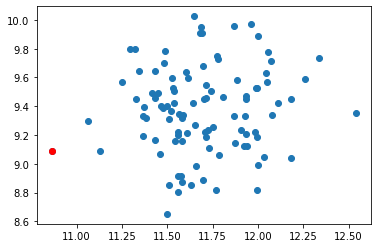

In [92]:
############ 방법 2: Threshold 미지정, Quantile 값으로 추후 지정
iforest = IsolationForest(n_estimators=100) # <-------------***
print(iforest)

iforest.fit(x)
# The anomaly score of the input samples. 
# The lower, the more abnormal. 
# Negative scores represent outliers, positive scores represent inliers.
scores = iforest.score_samples(x)
print('Scores :')
print(scores)


thresh = quantile(scores, 0.01) # <-------------***
print('Threshold: %.3f' % thresh)
 
index = where(scores <= thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

In [93]:
?IsolationForest

# 4. 머신 러닝의 기초

## 4.1. 개념과 종류

## 4.2. 모델의 평가

## [실습 12] k-fold CV (타이타닉 생존자 예측)

#### 데이터 불러오기 및 Data Preprocessing

* 데이터 불러오기

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* 변수 이름    
    * Passengerid: 탑승자 데이터 일련번호
    * survived: 생존 여부, 0 = 사망, 1 = 생존
    * Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
    * sex: 탑승자 성별
    * name: 탑승자 이름
    * Age: 탑승자 나이
    * sibsp: Sibling & Spouse, 같이 탑승한 형제자매 또는 배우자 인원수
    * parch: Parent & Children, 같이 탑승한 부모님 또는 어린이 인원수
    * ticket: 티켓 번호
    * fare: 요금
    * cabin: 선실 번호
    * embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [95]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


* NULL 컬럼들에 대한 처리

In [96]:
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum())

데이터 세트 Null 값 갯수  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [97]:
# Null이 있을면 값을 채우기

titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum())

데이터 세트 Null 값 갯수  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [98]:
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [99]:
# 변수별 값의 분포 보기

print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
B96 B98          4
C23 C25 C27      4
G6               4
F2               3
              ... 
E10              1
B102             1
D46              1
C148             1
B19              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


* Cabin 번호 대범주인 첫 알파벳만 저장하기

In [100]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(10))
titanic_df['Cabin'].value_counts()

0    N
1    C
2    N
3    C
4    N
5    N
6    E
7    N
8    N
9    N
Name: Cabin, dtype: object


N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

* Sex별 Survived 인원수 보기

In [101]:
titanic_df.groupby(['Sex','Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   81     81     81      81    81   
       1                 233     233   233  233    233    233     233   233   
male   0                 468     468   468  468    468    468     468   468   
       1                 109     109   109  109    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0            81        81  
       1           233       233  
male   0           468       468  
       1           109       109

In [102]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

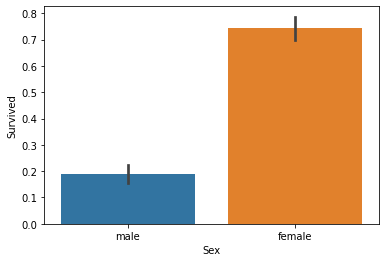

In [103]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

* Pclass(선실등급)별 Sex별 Survived 인원수 보기

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

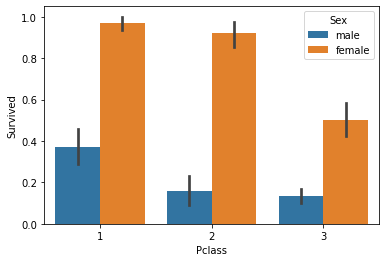

In [104]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

* Age별 Sex별 Survived 인원수 보기

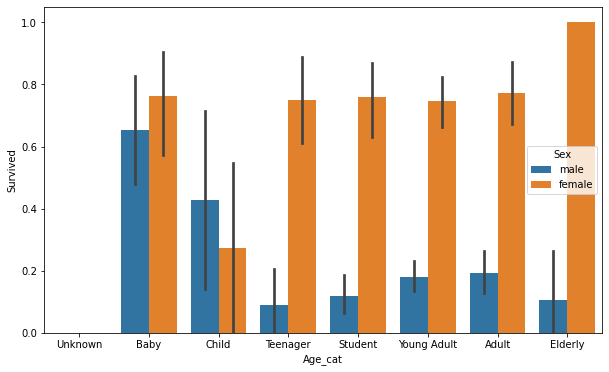

In [105]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

* label 인코딩(Cabin, Sex, Embarked)

In [106]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


* 앞선 preprocessing 과정을 자동화하는 함수 만들기

In [107]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [108]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

* training 과 test dataset의 분리

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [110]:
# Classifier를 이용해 학습 및 평가

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# 학습/예측/평가

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492


* k-fold CV 수행

In [111]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 

    
# exec_kfold 호출 (Decision Tree 분류기 이용)
exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


* cross_val_score() 로 간편화

In [112]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5) # <-------------***

for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [113]:
?cross_val_score

* GridSearchCV()를 이용한 hyperparameter tuning, CV 수행, 그리고 test data 예측

In [114]:
from sklearn.model_selection import GridSearchCV

# 고려할 파라메터 정의
parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5) # <-------------***
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test) # <-------------***
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


## [실습 13] 분류(classfication) 성능지표

### <1> Titanic Survivals 데이터셋

#### Accuracy

* dummy 분류기 생성

In [115]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) 메소드는 아무것도 학습하지 않음. 
    def fit(self, X , y=None):
        pass
    
    # predict( ) 메소드는 아주 단순한 분류기(즉, 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1)로 예측함. 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1: # <-------------***
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

* 데이터 전처리 함수생성

In [116]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

* raw data (titanic_train) 호출, X-y 구분, 전처리, Dummy Classifier로 학습/예측/평가 수행

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)



# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행. 
myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

Dummy Classifier의 정확도는: 0.7877


### <2>  MNIST handwritten digit 

* 데이터셋 호출 및 MyFakeClassifier(무조건 0으로 예측하는 분류기) 생성

In [118]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool) # <-------------***

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


* MNIST 데이터셋을 Imbalanced dataset으로 변환 (7이면 label=1, 아니면 label=0)

In [119]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [120]:
# digits번호가 7번이면 True이고 이를 astype(int)을 이용하여 1로 변환, 7번이 아니면 False이고 0으로 변환. 
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

* 무조건 0이라고 예측하는 MyFakeClassifier를 통한 예측정확도--> Accuracy 의 문제점 

In [121]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트(y_test) 크기 :', y_test.shape)
print('y_test에서 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier() # <-------------***
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

레이블 테스트 세트(y_test) 크기 : (450,)
y_test에서 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


**오차행렬(Confusion Matrix)**
* MNIST handwritten digit 데이터셋 예제

In [122]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix출력
confusion_matrix(y_test , fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

**정밀도(Precision) 과 재현율(Recall)**

* MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정

In [123]:
from sklearn.metrics import accuracy_score, precision_score , recall_score

print("정밀도:", precision_score(y_test, fakepred)) # <-------------***
print("재현율:", recall_score(y_test, fakepred)) # <-------------***

정밀도: 0.0
재현율: 0.0


#### Titanic 데이터셋에 대한 예측정확도 측정


* 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성

In [124]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

* Logistic Regression 이용

In [125]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression() # <-------------***

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


* Precision/Recall Trade-off
    * predict_proba(): label이 0일 확률, 1일 확률을 계산
    * Binarizer(): 임계값을 중심으로 0, 1 반환

* predict_proba( ) 메소드 확인 

In [126]:
pred_proba = lr_clf.predict_proba(X_test) # Logistic Regression을 이용할 때 predict_proba() # <-------------***
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46197701 0.53802299]
 [0.87868649 0.12131351]
 [0.87716331 0.12283669]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46197701 0.53802299 1.        ]
 [0.87868649 0.12131351 0.        ]
 [0.87716331 0.12283669 0.        ]]


* Binarizer 활용 

In [127]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)   # <-------------***                   
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


* predict()함수의 구조 만들어보기: 분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환 

In [128]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5 # <-------------***

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)  # <-------------***
custom_predict = binarizer.transform(pred_proba_1) # <-------------***

get_clf_eval(y_test, custom_predict)

# 앞선 pred = lr_clf.predict(X_test)
#      get_clf_eval(y_test , pred) 의 결과와 비교
# 정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


* 분류 결정 임계값 0.4 기반에서 Binarizer를 이용하여 예측값 변환 

In [129]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤  
custom_threshold = 0.4 # <-------------***
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361


* 여러개의 분류 결정 임곗값을 변경하면서 Binarizer를 이용하여 예측값 변환: get_eval_by_threshold() 생성 

In [130]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60] # <-------------***

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds): # <-------------***
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


* precision_recall_curve( ) 를 이용하여 임곗값에 따른 정밀도-재현율 값 추출 

In [131]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 ) # <-------------***
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (143,)
반환된 precisions 배열의 Shape: (144,)
반환된 recalls 배열의 Shape: (144,)
thresholds 5 sample: [0.10390279 0.10390503 0.10393018 0.1078841  0.10887762]
precisions 5 sample: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.96721311]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


* 임곗값의 변경에 따른 정밀도-재현율 변화 곡선을 그림 

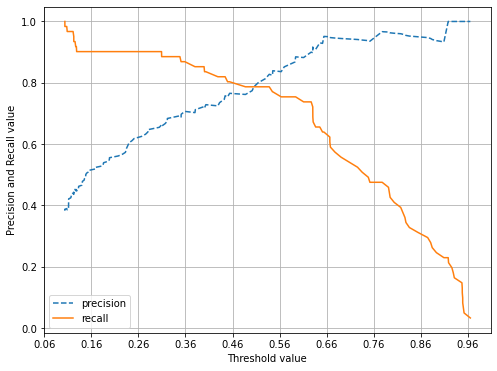

In [132]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1): # <-------------***
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] ) # <-------------***

**F1 Score**

In [133]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


* get_clf_eval()에 F1 score 추가

In [134]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

# 임계값별 분류 성능지표 계산 
thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1:0.7727
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1:0.7840
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1:0.7805
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1:0.7931
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1:0.8036


**ROC Curve와 AUC**
* roc_curve() 사용

In [135]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1) # <-------------***
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임곗값:  [1.97 0.75 0.63 0.59 0.49 0.4  0.35 0.23 0.13 0.12 0.11]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.051 0.127 0.161 0.203 0.331 0.585 0.636 0.797]
샘플 임곗값별 TPR:  [0.    0.475 0.689 0.754 0.787 0.836 0.869 0.902 0.918 0.967 0.967]


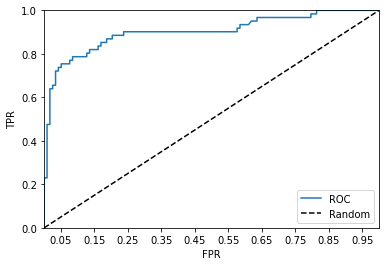

In [136]:
def roc_curve_plot(y_test , pred_proba_c1): # <-------------***
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR'); plt.ylabel('TPR')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] ) # <-------------***

* AUC 계산

In [137]:
from sklearn.metrics import roc_auc_score

### roc_auc_score(y_test, y_score)에서y_score는 
### predict_proba()로 호출된 예측 확률 ndarray중 Positive 열에 해당하는 ndarray입니다. 

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba) # <-------------***
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9024


* 분류 성능지표 계산 함수 update

In [138]:
# 분류 성능지표 계산함수에 AUC값 추가
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

## [실습 14] 회귀 성능 지표 (보스턴 주택 가격 예측)

* 데이터 불러오기

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* PRICE: 본인 소유의 주택 가격(중앙값)

* 각 컬럼별로 주택가격에 미치는 영향도를 조사

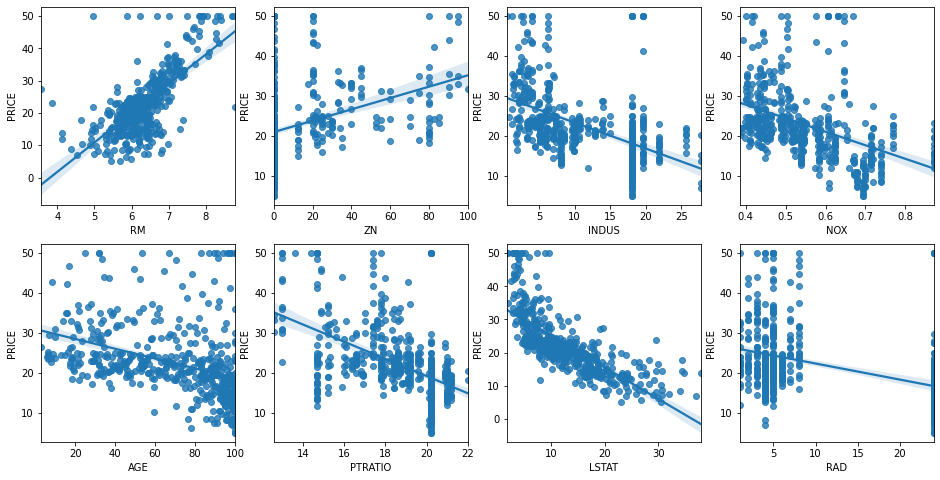

In [140]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

**학습과 테스트 데이터 세트로 분리하고 학습/예측/평가 수행**

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds) # <-------***
rmse = np.sqrt(mse) # <--------***

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('R square score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
R square score : 0.757


* 회귀식 확인

In [142]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164705
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [143]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명 임에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

* k fold CV 수행

In [144]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, # <-------***
                                 scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


## [실습 15] Bias-variance trade-off

### Polynomial Regression의 이해

* PolynomialFeatures 클래스로 다항식 변환

- 1차 단항 feature $[x_1, x_2]$
- 2차 다항 feature $[1, x_1, x_2, x_1x_2, x_1^2, x_2^2]$
- 3차 다항 feature $[1, x_1, x_2, x_1x_2, x_1^2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3]$

* (1) 1차 단항식 데이터 생성 후 이를 2차 다항식 데이터로 변경하기

In [145]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('1차 단항식 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)# <-------***
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 feature:\n', poly_ftr)

1차 단항식 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


* (2) 3차 다항식으로 구성된 target y를 구하는 임의의 함수 polynomial_func(X) 생성. 즉 회귀식은 target $y = 1+ 2x_1 + 3x_1^2 + 4x_2^3$ 

In [146]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

X = np.arange(0,4).reshape(2,2)
print('1차 단항식 feature: \n' ,X)

y = polynomial_func(X)# <-------***
print('3차 다항식 target, 즉 y: \n', y)

1차 단항식 feature: 
 [[0 1]
 [2 3]]
3차 다항식 target, 즉 y: 
 [  5 125]


* (3) 3차 다항식 feature값으로 target값을 예측하는 polynomial regression 학습

In [147]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)# <-------***
print('3차 다항식 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 feature와 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()# <-------***
model.fit(poly_ftr,y)# <-------***
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


* (4) 사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습

(사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해줍니다.)

In [148]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),# <-------***
                  ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)# <-------***
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### Polynomial regression을 이용한 Boston house price 예측

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

## Pipeline을 이용하여 2차 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합. 
p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),# <-------***
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('R square score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Boston 데이타셋 크기 : (506, 14)
MSE : 15.556 , RMSE : 3.944
R square score : 0.782


* 2차 다항식을 적용할 시의 추정 계수와 1차 단항식의 추정 계수 갯수 확인

In [150]:
X_train_poly= PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape # 모델의 복잡도(회귀계수의 갯수) 비교

((354, 104), (354, 13))

### Polynomial Regression 을 이용한 Underfitting, Overfitting 이해
* cosine 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만듬

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

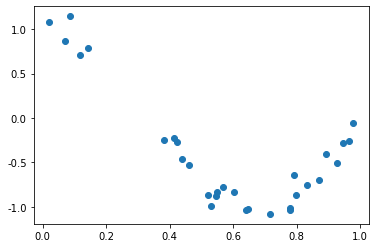

In [152]:
plt.scatter(X, y)

* Polynomial regression의 차수를 달리하며 결과 비교


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417000e+06  2.03717200e+07
 -1.44874017e+08  7.09319141e+08 -2.47067172e+09  6.24564702e+09
 -1.15677216e+10  1.56895933e+10 -1.54007040e+10  1.06457993e+10
 -4.91381016e+09  1.35920642e+09 -1.70382078e+08] 입니다.
Degree 15 MSE 는 182581084.83 입니다.


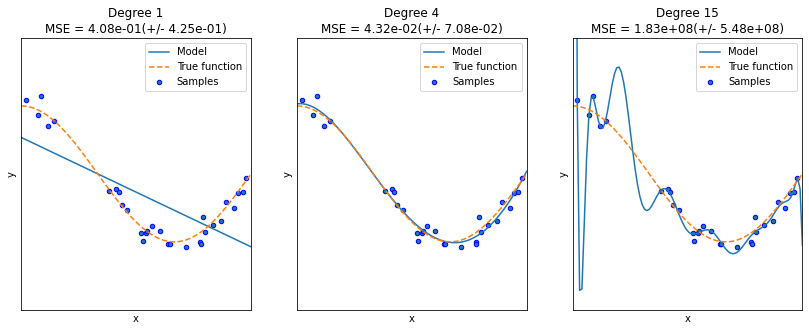

In [153]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); 
    plt.ylabel("y"); 
    plt.xlim((0, 1)); 
    plt.ylim((-2, 2)); 
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

## [실습 종료] 수고하셨습니다. 